In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('datasets/manufacturing_dataset.csv')

In [4]:
data.head(20)

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,413.97,1,4.86,1.57,2.34,0.048,1.65,1,22.8,47.2
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,181.16,2,2.51,0.18,1.52,0.030,NaN,1,23.8,37.9
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,452.15,2,0.34,2.88,0.57,0.026,0.26,0,24.5,56.1
3,1900-01-03,2020-01-04,Appliances,11,Day,133,NaN,21.68,40.21,28.70,485.78,3,4.64,2.23,1.90,0.036,NaN,2,22.3,50.8
4,1900-01-04,2020-01-05,Electronics,14,Night,82,NaN,16.68,38.02,17.20,315.58,1,2.29,0.02,2.25,0.020,0.67,0,23.4,53.9
5,1900-01-05,2020-01-06,Automotive,1,Night,81,0.0,11.91,10.66,23.25,440.42,2,NaN,NaN,0.89,0.047,NaN,2,20.6,56.9
6,1900-01-06,2020-01-07,Furniture,20,Swing,78,8.0,22.98,37.66,26.62,367.89,2,2.51,2.83,0.82,0.036,0.86,2,23.1,45.9
7,1900-01-07,2020-01-08,Textiles,7,Night,151,5.0,23.16,30.99,27.86,197.62,3,2.10,2.39,0.56,0.039,0.35,1,23.6,59.2
8,1900-01-08,2020-01-09,Electronics,16,Night,72,9.0,15.63,16.92,28.30,467.34,2,0.38,0.82,2.02,0.041,0.59,0,20.4,48.3
9,1900-01-09,2020-01-10,Textiles,7,Night,189,7.0,18.15,33.47,23.33,411.71,1,0.62,2.03,2.32,0.042,0.24,0,18.7,49.4


In [5]:
data.shape

(3000, 20)

In [6]:
data.dtypes

Production ID                      object
Date                               object
Product Type                       object
Machine ID                          int64
Shift                              object
Units Produced                      int64
Defects                           float64
Production Time Hours             float64
Material Cost Per Unit            float64
Labour Cost Per Hour              float64
Energy Consumption kWh            float64
Operator Count                      int64
Maintenance Hours                 float64
Down time Hours                   float64
Production Volume Cubic Meters    float64
Scrap Rate                        float64
Rework Hours                      float64
Quality Checks Failed               int64
Average Temperature C             float64
Average Humidity Percent          float64
dtype: object

In [7]:
data.dtypes[data.dtypes=='int64'] 

Machine ID               int64
Units Produced           int64
Operator Count           int64
Quality Checks Failed    int64
dtype: object

In [8]:
data.dtypes[data.dtypes=='float64']

Defects                           float64
Production Time Hours             float64
Material Cost Per Unit            float64
Labour Cost Per Hour              float64
Energy Consumption kWh            float64
Maintenance Hours                 float64
Down time Hours                   float64
Production Volume Cubic Meters    float64
Scrap Rate                        float64
Rework Hours                      float64
Average Temperature C             float64
Average Humidity Percent          float64
dtype: object

In [9]:
data.dtypes[data.dtypes=='object']

Production ID    object
Date             object
Product Type     object
Shift            object
dtype: object

In [10]:
#change product type and shift to category
data['Product Type']=data['Product Type'].astype('category')
data['Shift']=data['Shift'].astype('category')

In [11]:
data.dtypes[data.dtypes=='category']

Product Type    category
Shift           category
dtype: object

In [12]:
# datetime datatype
date=pd.DatetimeIndex(data['Date'])

In [13]:
data['doy']=date.dayofyear
data['dow']=date.dayofweek
data['month']=date.month
data['woy']=date.strftime('%V').astype('float')

In [14]:
data[['doy','dow','month','woy']]

,doy,dow,month,woy
0,1,2,1,1.0
1,2,3,1,1.0
2,3,4,1,1.0
3,4,5,1,1.0
4,5,6,1,1.0
...,...,...,...,...
2995,74,1,3,11.0
2996,75,2,3,11.0
2997,76,3,3,11.0
2998,77,4,3,11.0


In [15]:
data.columns
print(data.columns)

Index(['Production ID', 'Date', 'Product Type', 'Machine ID', 'Shift',
       'Units Produced', 'Defects', 'Production Time Hours',
       'Material Cost Per Unit', 'Labour Cost Per Hour',
       'Energy Consumption kWh', 'Operator Count', 'Maintenance Hours',
       'Down time Hours', 'Production Volume Cubic Meters', 'Scrap Rate',
       'Rework Hours', 'Quality Checks Failed', 'Average Temperature C',
       'Average Humidity Percent', 'doy', 'dow', 'month', 'woy'],
      dtype='object')


In [16]:
data.dtypes

Production ID                       object
Date                                object
Product Type                      category
Machine ID                           int64
Shift                             category
Units Produced                       int64
Defects                            float64
Production Time Hours              float64
Material Cost Per Unit             float64
Labour Cost Per Hour               float64
Energy Consumption kWh             float64
Operator Count                       int64
Maintenance Hours                  float64
Down time Hours                    float64
Production Volume Cubic Meters     float64
Scrap Rate                         float64
Rework Hours                       float64
Quality Checks Failed                int64
Average Temperature C              float64
Average Humidity Percent           float64
doy                                  int32
dow                                  int32
month                                int32
woy        

In [17]:
numerical_columns=data.select_dtypes(include=['int64','float64','int32'])
#numerical=data.dtypes[data.dtypes==('int64','float64','int32')]
numerical_columns

,Machine ID,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent,doy,dow,month,woy
0,3,142,3.0,23.42,38.68,15.38,413.97,1,4.86,1.57,2.34,0.048,1.65,1,22.8,47.2,1,2,1,1.0
1,8,170,4.0,7.51,21.35,25.36,181.16,2,2.51,0.18,1.52,0.030,NaN,1,23.8,37.9,2,3,1,1.0
2,11,182,4.0,20.58,47.54,16.46,452.15,2,0.34,2.88,0.57,0.026,0.26,0,24.5,56.1,3,4,1,1.0
3,11,133,NaN,21.68,40.21,28.70,485.78,3,4.64,2.23,1.90,0.036,NaN,2,22.3,50.8,4,5,1,1.0
4,14,82,NaN,16.68,38.02,17.20,315.58,1,2.29,0.02,2.25,0.020,0.67,0,23.4,53.9,5,6,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3,194,7.0,20.74,16.91,15.94,215.04,4,3.06,2.28,1.03,0.021,0.51,1,21.6,53.6,74,1,3,11.0
2996,13,119,4.0,14.77,34.50,25.95,291.65,2,2.27,0.80,2.09,0.016,1.22,2,24.2,50.9,75,2,3,11.0
2997,9,170,2.0,20.38,33.02,18.61,313.24,1,4.66,1.86,1.41,0.047,0.19,0,24.2,51.4,76,3,3,11.0
2998,20,199,3.0,1.01,24.35,29.73,245.47,3,2.73,0.26,0.93,0.029,1.26,1,24.9,56.3,77,4,3,11.0


In [18]:
numericals=list(numerical_columns)
numericals

['Machine ID',
 'Units Produced',
 'Defects',
 'Production Time Hours',
 'Material Cost Per Unit',
 'Labour Cost Per Hour',
 'Energy Consumption kWh',
 'Operator Count',
 'Maintenance Hours',
 'Down time Hours',
 'Production Volume Cubic Meters',
 'Scrap Rate',
 'Rework Hours',
 'Quality Checks Failed',
 'Average Temperature C',
 'Average Humidity Percent',
 'doy',
 'dow',
 'month',
 'woy']

## Problems for EDA dataset

### 1. Dealing with IQR using outlier

__Calculate the Interquartile Range (IQR) for all the numerical columns and use the IQR to identify any potential outliers in these data points.__

In [19]:
def UVA_outlier(data,var_group,include_outlier=True):
    

    size=len(var_group)
    plt.figure(figsize=(7*size,4))

    for j,i in enumerate(var_group):
        

        #calculating descriptives of variable
        quant25=data[i].quantile(0.25)
        quant75=data[i].quantile(0.75)
        IQR=quant75-quant25
        median=data[i].median()
        whis_low=quant25-(IQR*1.5)
        whis_high=quant75+(IQR*1.5)

        #calculate number of outliers
        lower_outlier=len(data[i][data[i]<whis_low])
        higher_outlier=len(data[i][data[i]>whis_high])

        if include_outlier==True:
            print('include_outlier')
    
            #plotting the variable with every information
            fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(12,6))
            sns.boxplot(data=data[i],orient='v')
            plt.ylabel('{}'.format(i))
            plt.title('with outliers\n IQR={};median={}\n (outlier_low,outlier_high)={}\n'.format(round(IQR,2),round(median,2),
                                                                                     (lower_outlier,higher_outlier)))      



include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier
include_outlier


<Figure size 14000x400 with 0 Axes>

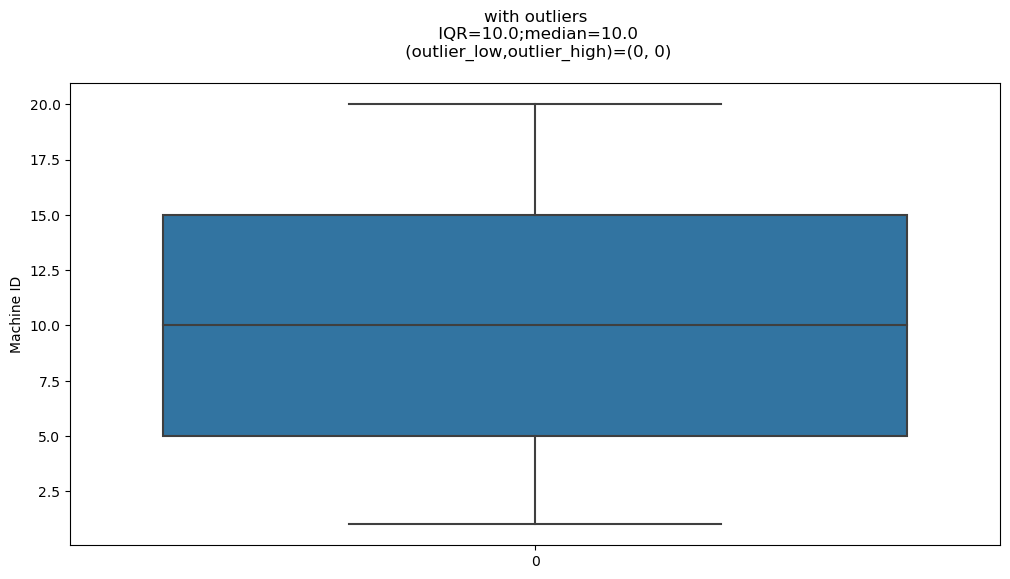

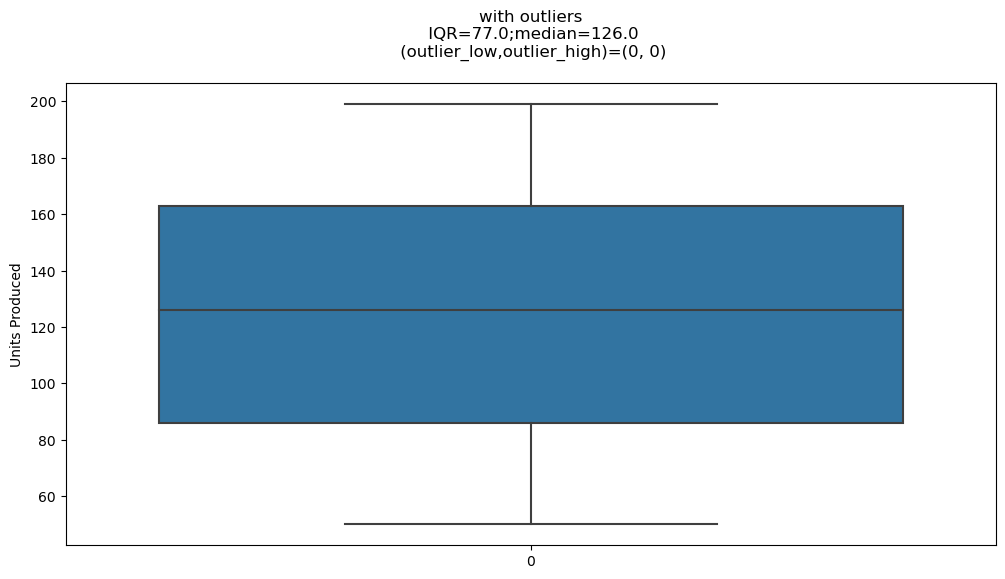

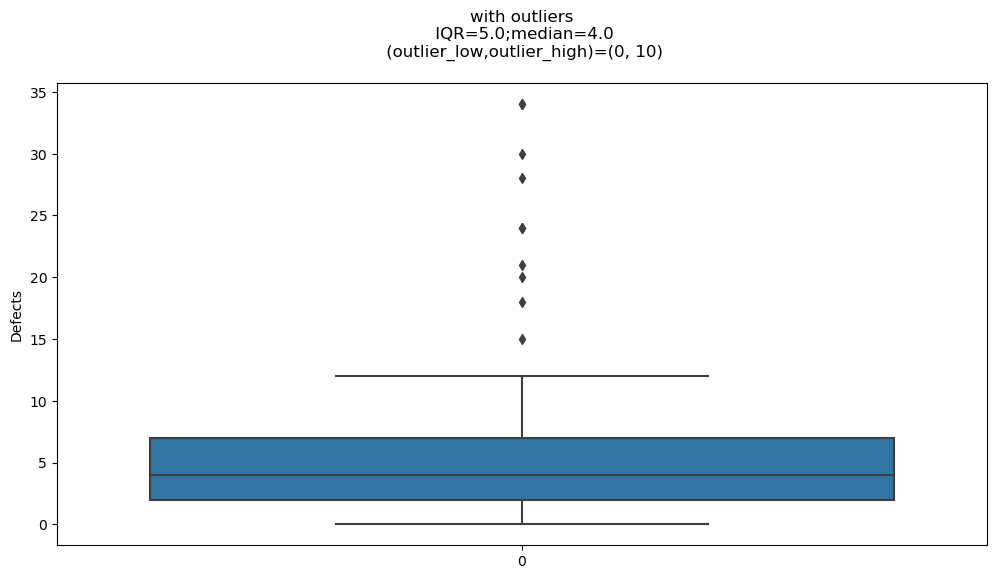

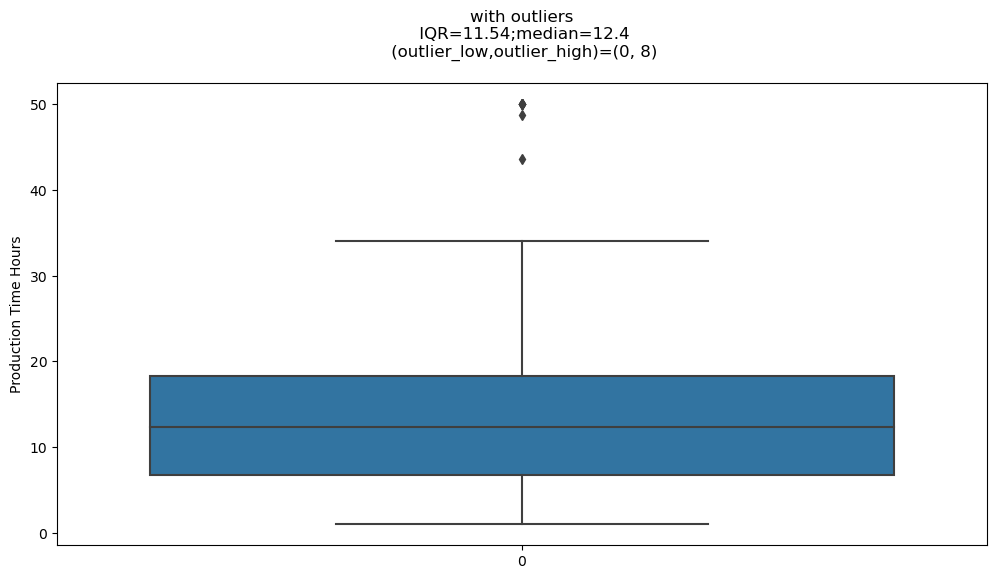

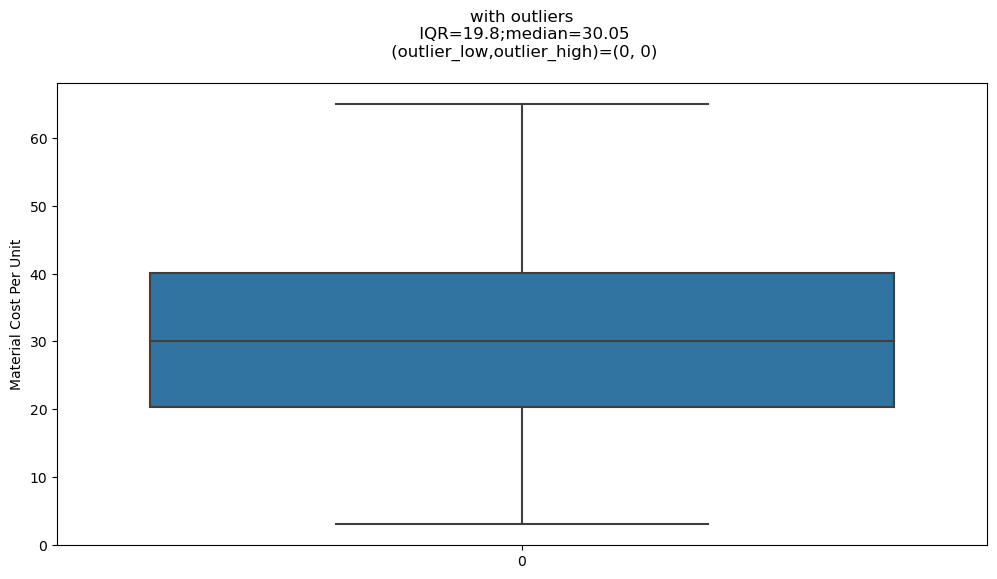

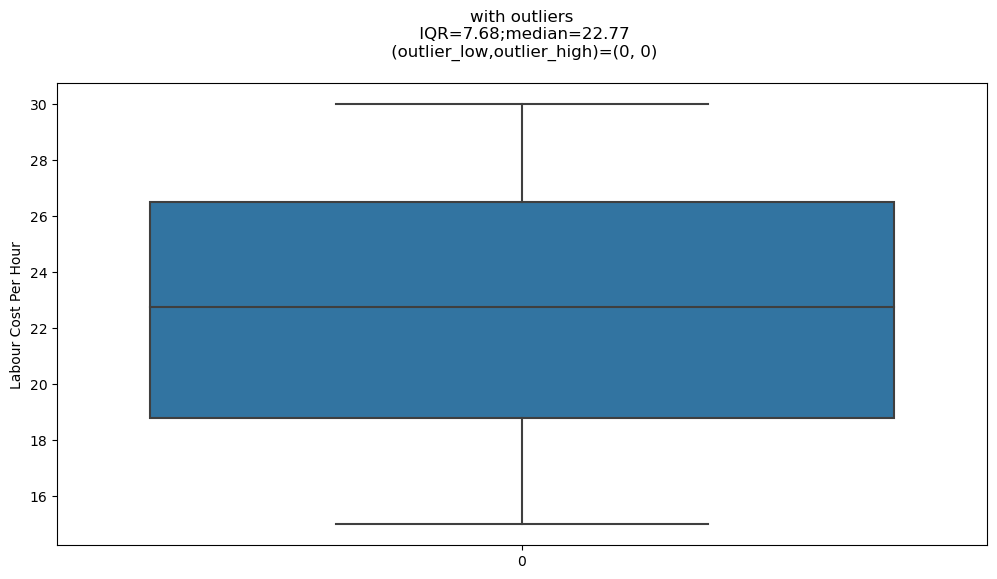

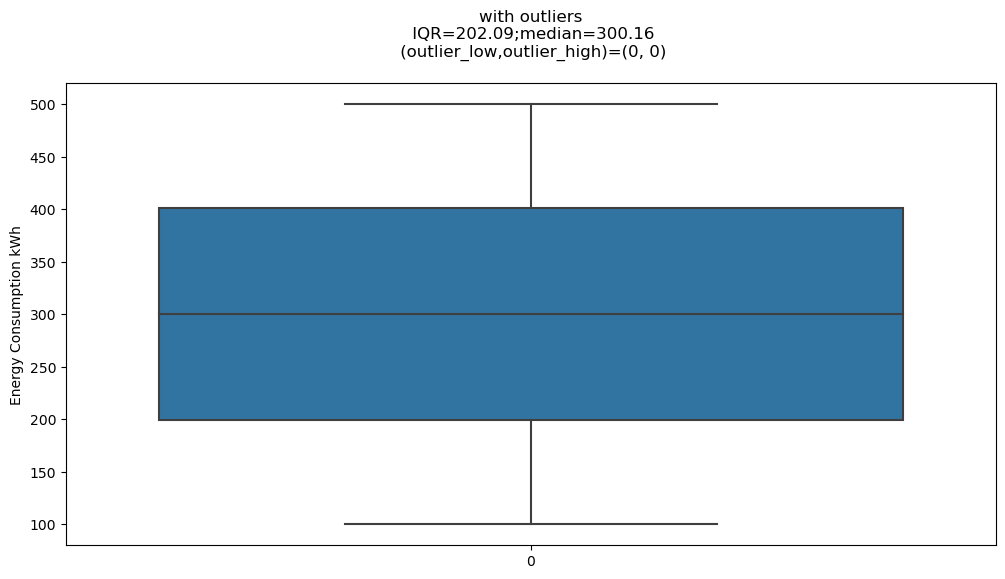

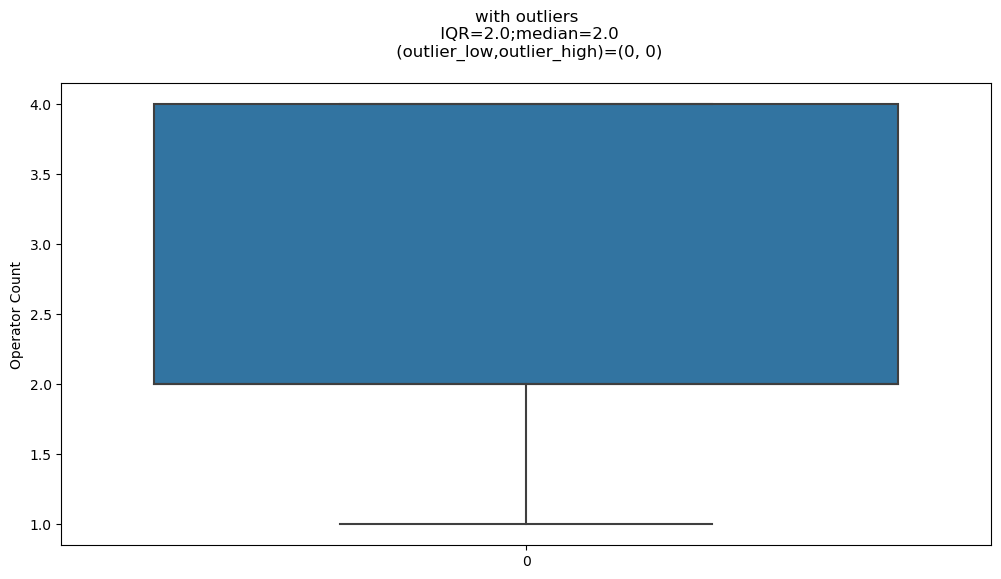

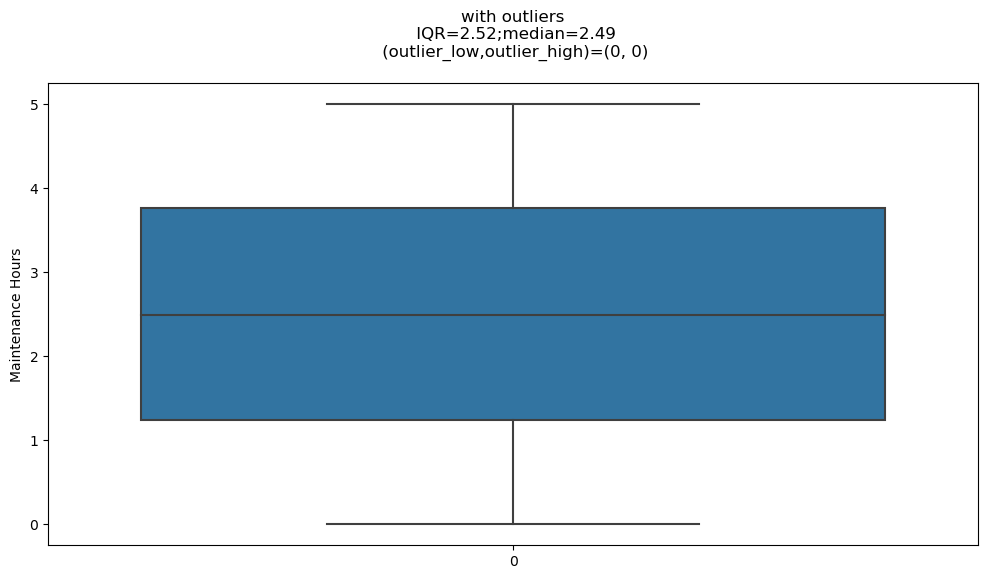

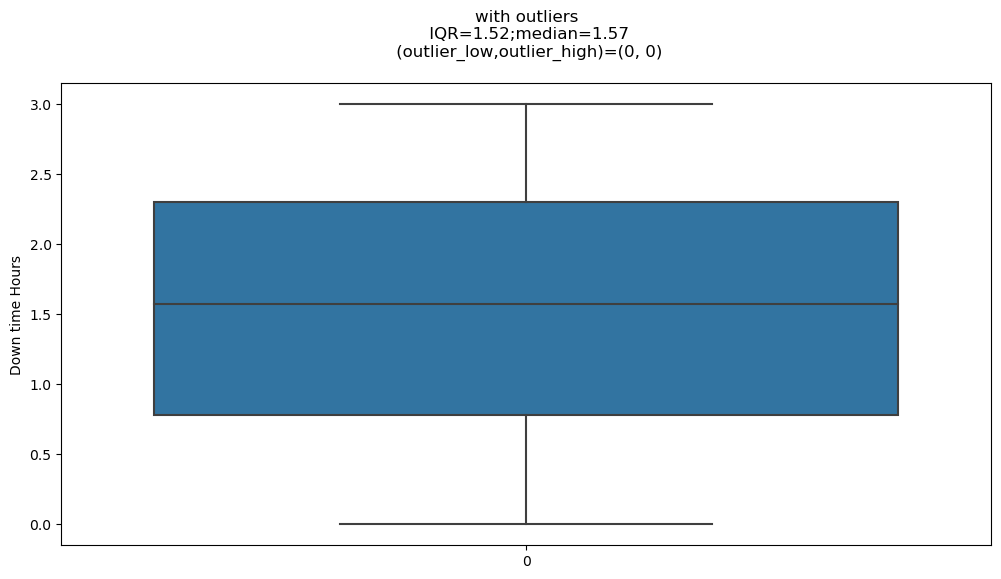

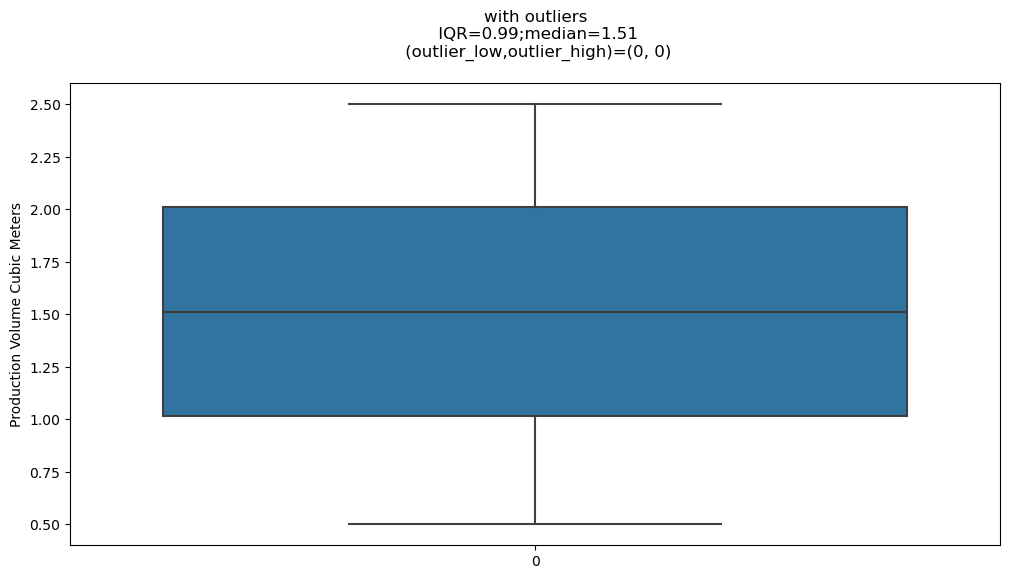

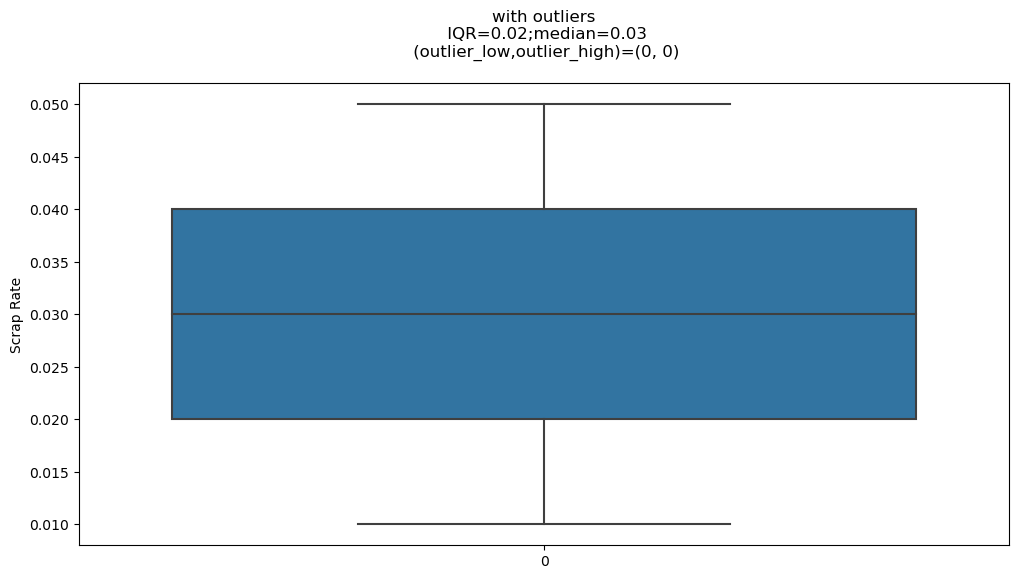

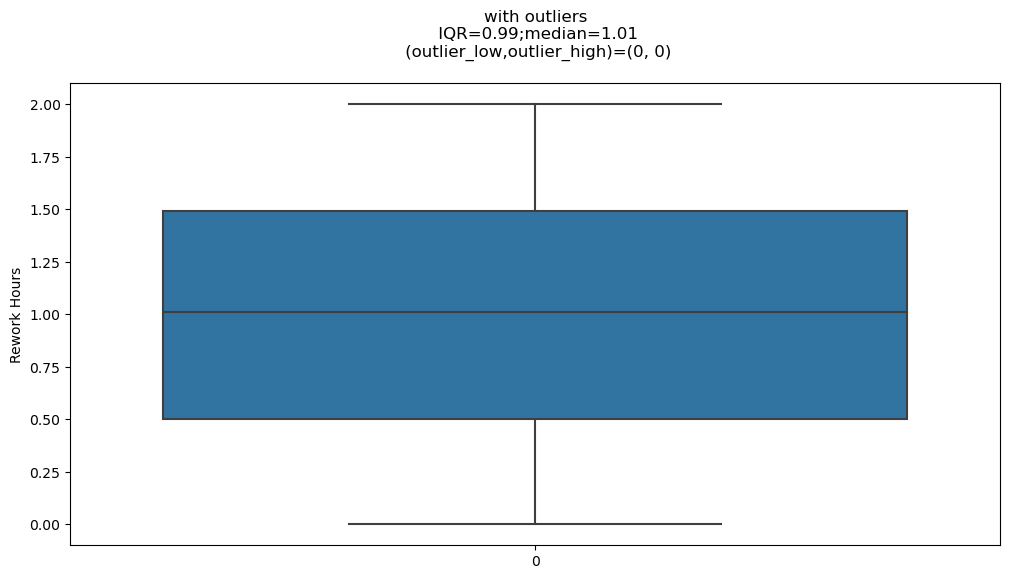

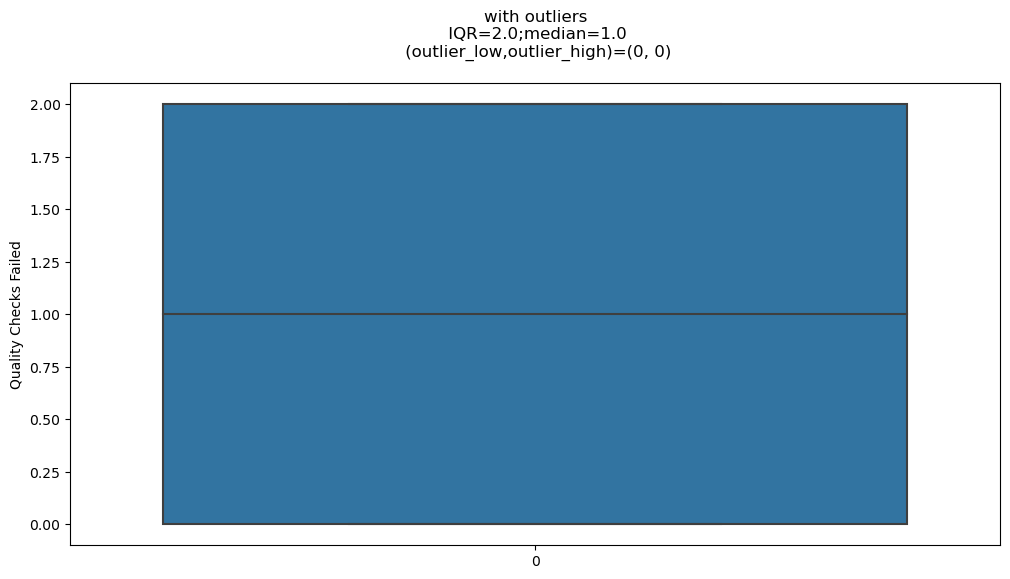

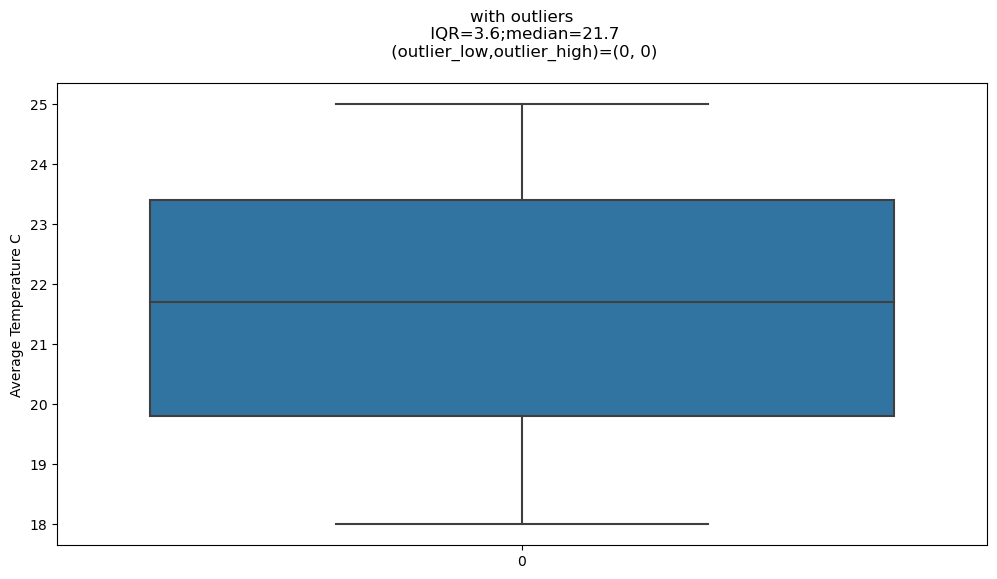

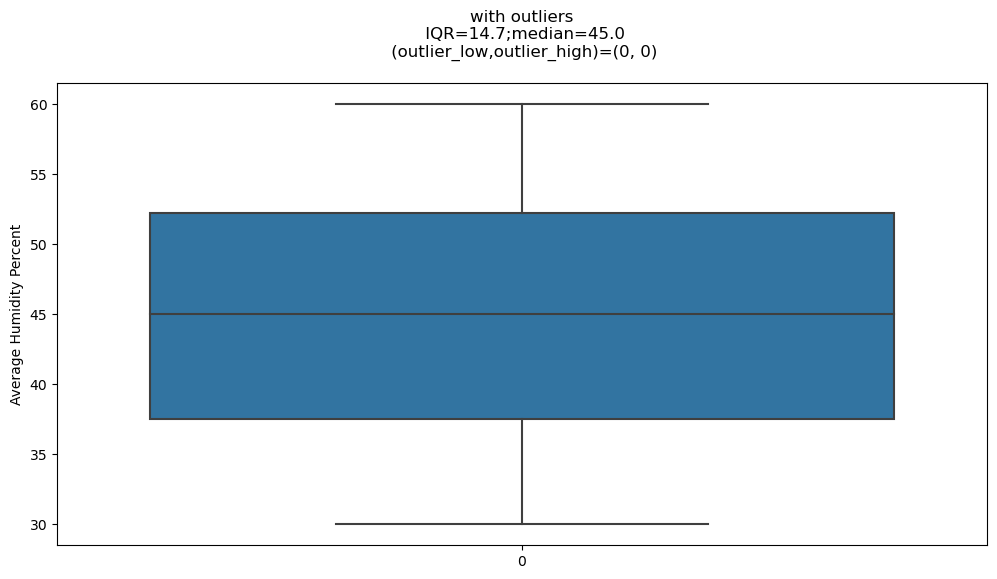

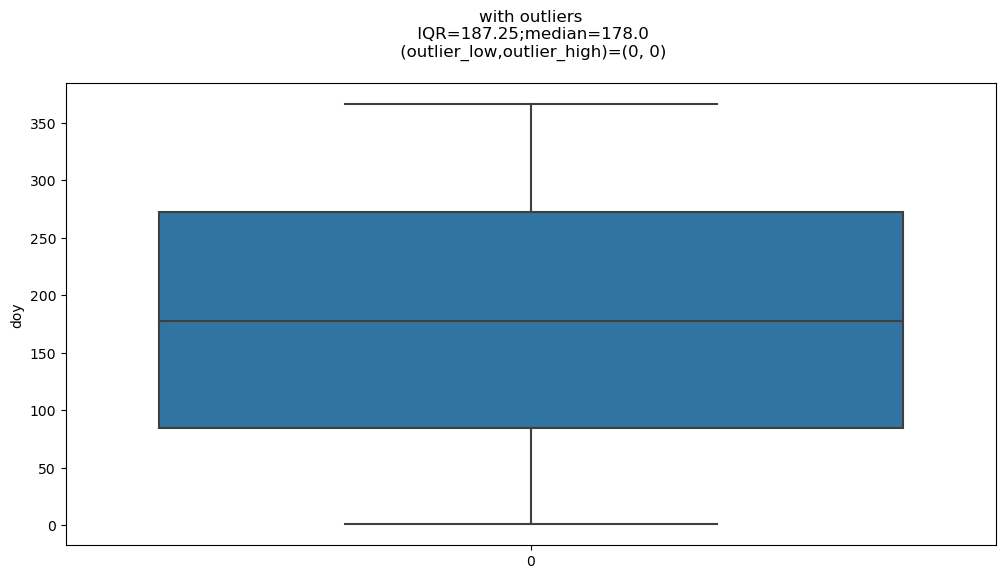

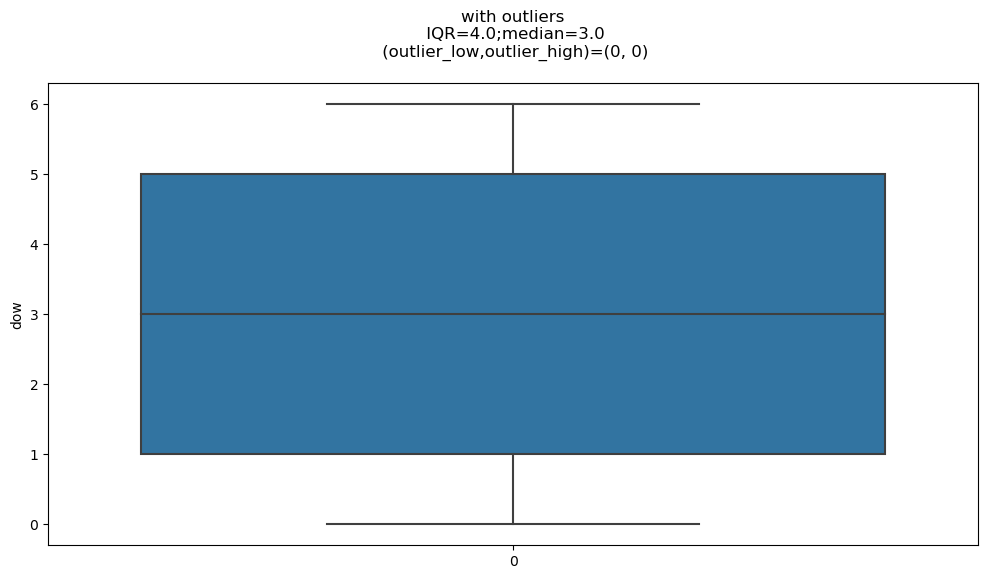

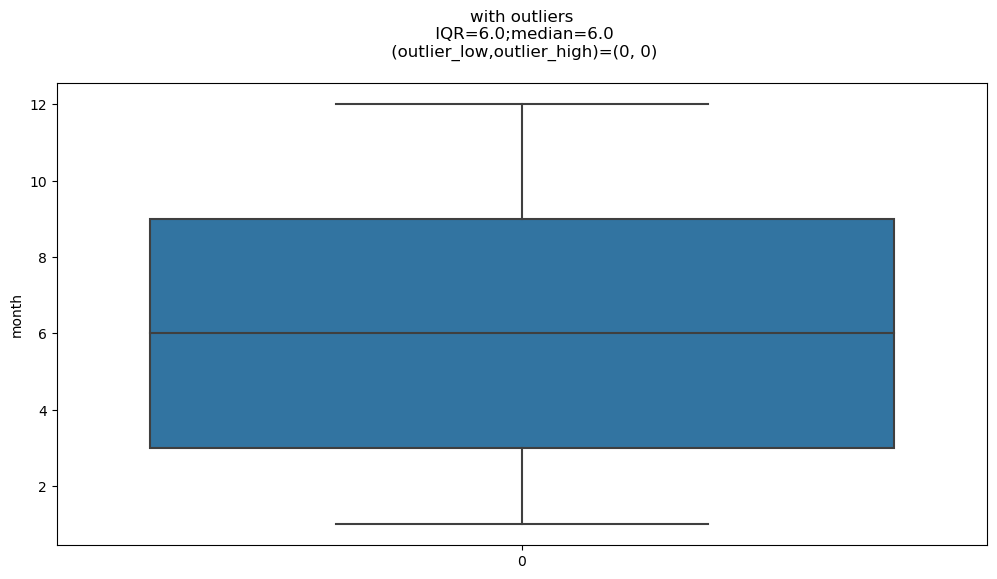

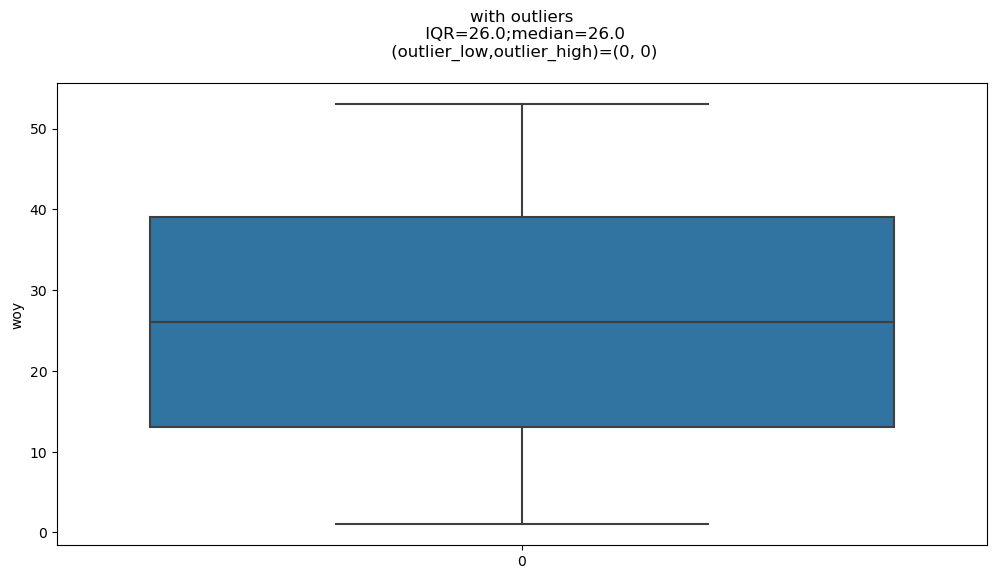

In [20]:
UVA_outlier(data,numericals,include_outlier=True)

### 2. Identify Missing Values Across Key Production Metrics:

__Analyse the dataset to identify missing values across all the columns and calculate the total number of missing values for each of these columns. Describe your findings and then impute all the missing values with suitable data points.__

In [21]:
data.isna().sum()


Production ID                       0
Date                                0
Product Type                        0
Machine ID                          0
Shift                               0
Units Produced                      0
Defects                           299
Production Time Hours               0
Material Cost Per Unit              0
Labour Cost Per Hour                0
Energy Consumption kWh              0
Operator Count                      0
Maintenance Hours                 300
Down time Hours                   300
Production Volume Cubic Meters      0
Scrap Rate                          0
Rework Hours                      300
Quality Checks Failed               0
Average Temperature C               0
Average Humidity Percent            0
doy                                 0
dow                                 0
month                               0
woy                                 0
dtype: int64

In [22]:
data.Defects.fillna(data.Defects.mean(),inplace=True)
data['Maintenance Hours'].fillna(data['Maintenance Hours'].mean(),inplace=True)
data['Down time Hours'].fillna(data['Down time Hours'].mean(),inplace=True)
data['Rework Hours'].fillna(data['Rework Hours'].mean(),inplace=True)

In [23]:
data.isna().sum()

Production ID                     0
Date                              0
Product Type                      0
Machine ID                        0
Shift                             0
Units Produced                    0
Defects                           0
Production Time Hours             0
Material Cost Per Unit            0
Labour Cost Per Hour              0
Energy Consumption kWh            0
Operator Count                    0
Maintenance Hours                 0
Down time Hours                   0
Production Volume Cubic Meters    0
Scrap Rate                        0
Rework Hours                      0
Quality Checks Failed             0
Average Temperature C             0
Average Humidity Percent          0
doy                               0
dow                               0
month                             0
woy                               0
dtype: int64

### 3. Relationship Between Costs:

 __Is there a pattern between the cost of materials per unit and the hourly labor cost? Determine if higher costs in materials tend to coincide with higher labor costs.__

In [24]:
data2=data[['Material Cost Per Unit','Labour Cost Per Hour']]
data2

,Material Cost Per Unit,Labour Cost Per Hour
0,38.68,15.38
1,21.35,25.36
2,47.54,16.46
3,40.21,28.70
4,38.02,17.20
...,...,...
2995,16.91,15.94
2996,34.50,25.95
2997,33.02,18.61
2998,24.35,29.73


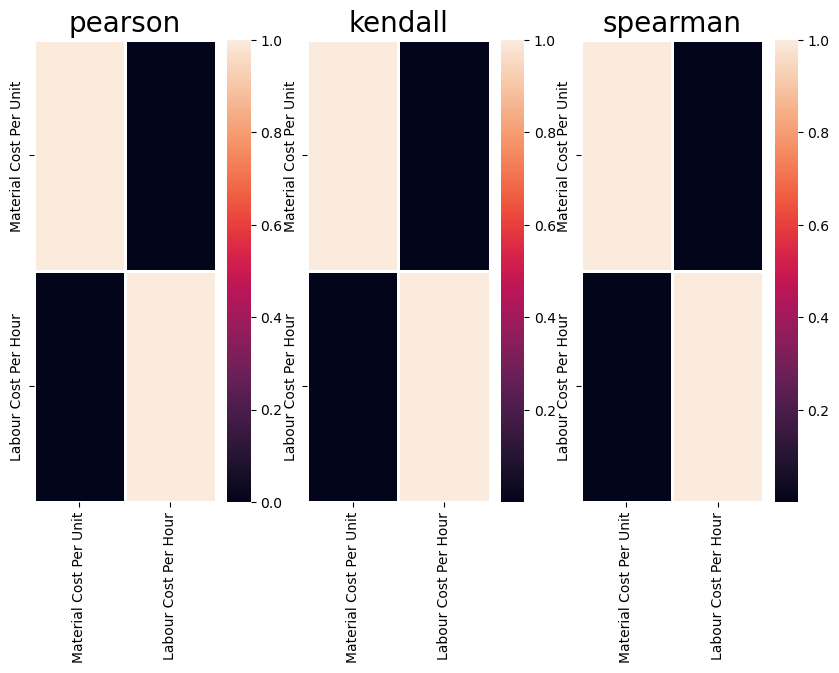

In [25]:
plt.figure(figsize=(10,6),dpi=100)
for j,i in enumerate(['pearson','kendall','spearman']):
    correlation=data2.dropna().corr(method=i)
    plt.subplot(1,3,j+1)
    sns.heatmap(correlation,linewidth=2)
    plt.title(i,fontsize=20)                  
                      
                      

### 4. Efficiency Across Shifts:

__Do different work shifts (Day, Swing, Night) show differences in how long products take to make or how much energy they use? Compare these shifts to see if one is more efficient or uses less energy.__

Shift
Day      298.903686
Night    302.865897
Swing    297.890168
Name: Energy Consumption kWh, dtype: float64


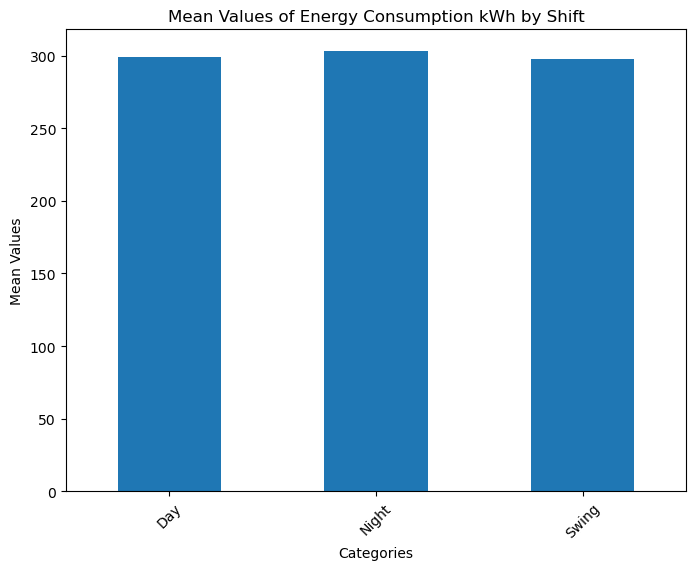

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_by_category(data, cont, cat):
    # Calculate mean values for each category
    mean_values = data.groupby(cat)[cont].mean()
    print(mean_values)
    # Plotting
    plt.figure(figsize=(8, 6))
    mean_values.plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Mean Values')
    plt.title(f'Mean Values of {cont} by {cat}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame and 'Energy Consumption kWh' is the continuous variable
# and 'Shift' is the categorical variable
plot_mean_by_category(data,'Energy Consumption kWh','Shift')

In [27]:
data['Shift'].value_counts()

Shift
Night    1009
Swing    1009
Day       982
Name: count, dtype: int64

In [28]:
def Two_sample_z_test(m1,m2,std1,std2,n1,n2):
    from numpy import sqrt,abs,round
    from scipy.stats import norm
    numerator=(m1-m2)
    denominator=sqrt(std1**2/n1 + std2**2/n2)
    z=numerator/denominator
    p_val=1-norm.cdf(abs(z)) #one tailed test

def Bivariate_cont_cat(data,cont,cat,category):
    sample_data1=data[cont][data[cat]==category][:100]
    sample_data2=data[cont][~(data[cat]==category)][:100]
    
    
    sample_mean_1=sample_data1.mean()
    sample_mean_2=sample_data2.mean()
    sd1=sample_data1.std()
    sd2=sample_data2.std()
    n1=sample_data1.shape[0]
    n2=sample_data2.shape[0]
    
    
    p_val=Two_sample_z_test(sample_mean_1,sample_mean_1,sd1,sd2,n1,n2)
    
    table_mean=pd.pivot_table(data=data,columns=cat,values=cont,aggfunc=np.mean)
    print(table_mean)
    
    plt.figure(figsize=(4,4),dpi=100)
    plt.subplot(1,2,1)
    sns.barplot(x=[str(category),'not{}'.format(category)],y=[sample_mean_1,sample_mean_2])
    plt.ylabel('mean{}'.format(cont))
    plt.xlabel(cat)
    plt.title('ztest_p_val={}\n {}'.format(p_val,table_mean))

    
    

Shift                          Day       Night       Swing
Energy Consumption kWh  298.903686  302.865897  297.890168


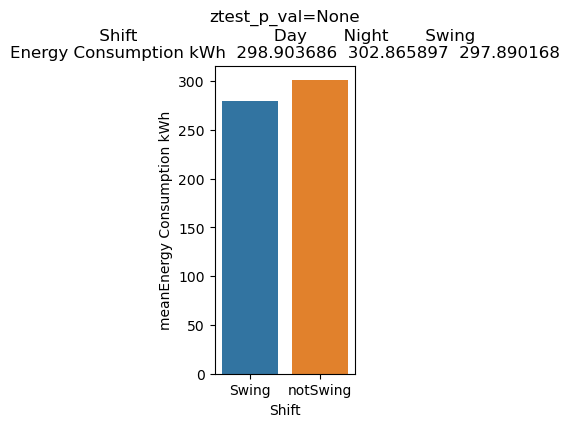

In [29]:
Bivariate_cont_cat(data,'Energy Consumption kWh','Shift','Swing')

Shift                          Day       Night       Swing
Energy Consumption kWh  298.903686  302.865897  297.890168


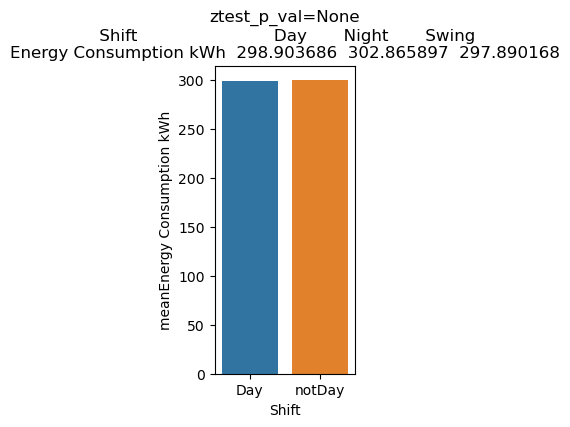

In [30]:
Bivariate_cont_cat(data,'Energy Consumption kWh','Shift','Day')

Shift                          Day       Night       Swing
Energy Consumption kWh  298.903686  302.865897  297.890168


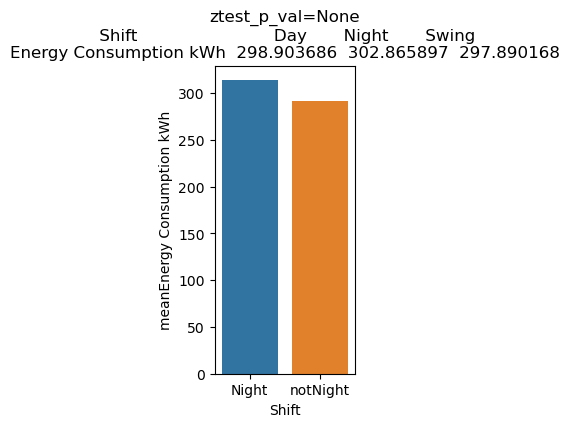

In [31]:
Bivariate_cont_cat(data,'Energy Consumption kWh','Shift','Night')

__A new method___

#### Certainly! Here's how you can conduct a bivariate analysis for a two-sample z-test comparing the mean efficiency or energy usage between two different work shifts:

### 5. Monthly Production Trends:

 __How does the average number of units produced change from month to month? Look for any patterns, such as times of the year when production increases or decreases significantly.__

In [32]:
data['month']=data['month'].astype('category')

In [33]:
data['month'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=False)

In [34]:
data.tail(20)

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,...,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent,doy,dow,month,woy
2980,1908-02-28,2028-02-28,Furniture,18,Night,79,6.0,23.44,10.90,19.36,...,2.32,0.038,0.67,1,21.0,44.4,59,0,2,9.0
2981,1908-02-29,2028-02-29,Electronics,15,Night,93,2.0,21.44,23.77,24.58,...,1.37,0.016,1.99,2,24.8,39.1,60,1,2,9.0
2982,1908-03-01,2028-03-01,Electronics,16,Day,140,6.0,14.63,49.78,15.78,...,2.32,0.045,1.89,2,20.1,30.2,61,2,3,9.0
2983,1908-03-02,2028-03-02,Automotive,4,Day,111,0.0,22.76,31.74,23.86,...,0.98,0.038,0.44,2,22.4,45.2,62,3,3,9.0
2984,1908-03-03,2028-03-03,Electronics,16,Swing,165,2.0,15.08,29.95,16.52,...,2.13,0.031,1.03,1,23.6,46.0,63,4,3,9.0
2985,1908-03-04,2028-03-04,Furniture,19,Night,87,0.0,15.31,12.75,25.23,...,1.77,0.043,1.83,0,18.6,48.2,64,5,3,9.0
2986,1908-03-05,2028-03-05,Electronics,16,Night,185,9.0,15.47,24.63,24.85,...,0.89,0.012,1.43,1,23.3,59.6,65,6,3,9.0
2987,1908-03-06,2028-03-06,Automotive,1,Night,105,0.0,19.98,27.99,24.35,...,0.75,0.038,1.75,2,24.9,55.2,66,0,3,10.0
2988,1908-03-07,2028-03-07,Electronics,13,Night,87,5.0,8.19,30.07,18.86,...,0.51,0.017,1.60,2,19.5,56.9,67,1,3,10.0
2989,1908-03-08,2028-03-08,Textiles,5,Night,67,2.0,8.14,45.91,25.03,...,1.18,0.021,1.24,1,23.7,30.2,68,2,3,10.0


month
1     124.605735
2     124.227451
3     125.921053
4     122.670833
5     127.250000
6     125.166667
7     127.592742
8     122.282258
9     128.670833
10    120.258065
11    125.066667
12    126.798387
Name: Units Produced, dtype: float64


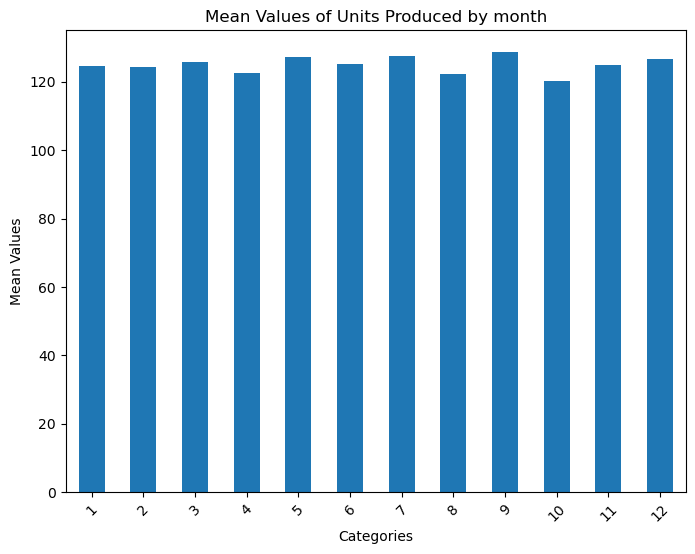

In [35]:
plot_mean_by_category(data, 'Units Produced','month')

### 6. Variability in Production by Product Type:

__Which type of product shows the most variation in how much is produced? Measure this using standard deviation to find out which product type's production volume varies the most.__

Product Type
Appliances     0.602654
Automotive     0.561560
Electronics    0.573125
Furniture      0.579365
Textiles       0.567891
Name: Production Volume Cubic Meters, dtype: float64


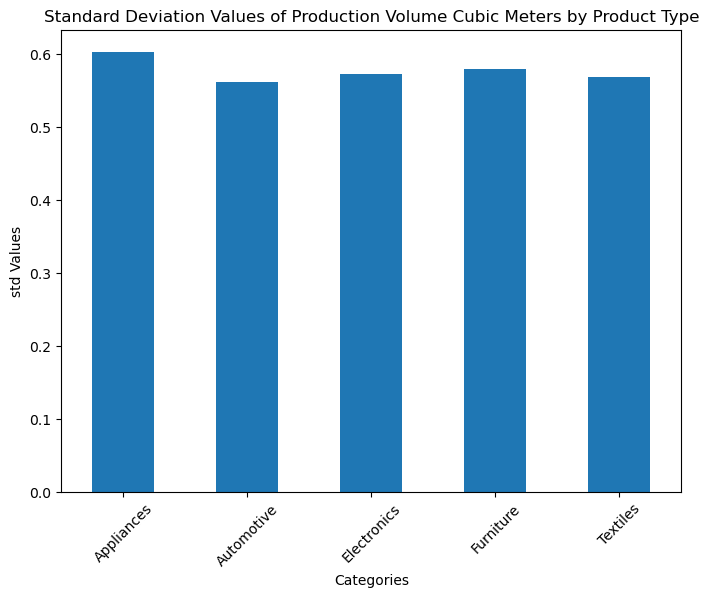

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_std_by_category(data, cont, cat):
    # Calculate std values for each category
    std_values = data.groupby(cat)[cont].std()
    print(std_values)
    # Plotting
    plt.figure(figsize=(8, 6))
    std_values.plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('std Values')
    plt.title(f'Standard Deviation Values of {cont} by {cat}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

plot_std_by_category(data,'Production Volume Cubic Meters','Product Type')

### 7. The Role of Operator Count in Efficiency:

__How does the number of operators affect how many units are produced per hour? Check if having more operators leads to more efficient production.__

Operator Count
1    124.030749
2    125.411688
3    125.898769
4    124.818908
Name: Units Produced, dtype: float64


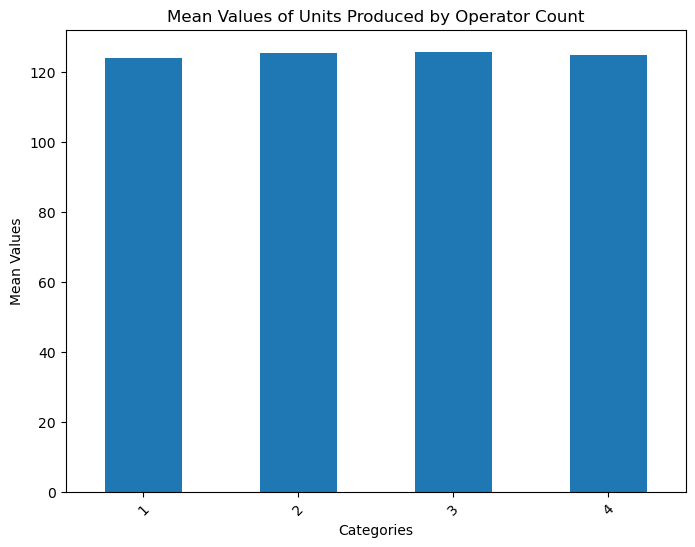

In [37]:
plot_mean_by_category(data, 'Units Produced','Operator Count')

### 8. Identifying the Machine with Most Defects:

__Which machine tends to produce the most defects, considering the total units it produces? Calculate the defect rate as defects per 100 units to make comparisons easier.__



In [38]:
data.head(10)

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,...,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent,doy,dow,month,woy
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.000000,23.42,38.68,15.38,...,2.34,0.048,1.650000,1,22.8,47.2,1,2,1,1.0
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.000000,7.51,21.35,25.36,...,1.52,0.030,1.002885,1,23.8,37.9,2,3,1,1.0
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.000000,20.58,47.54,16.46,...,0.57,0.026,0.260000,0,24.5,56.1,3,4,1,1.0
3,1900-01-03,2020-01-04,Appliances,11,Day,133,4.612736,21.68,40.21,28.70,...,1.90,0.036,1.002885,2,22.3,50.8,4,5,1,1.0
4,1900-01-04,2020-01-05,Electronics,14,Night,82,4.612736,16.68,38.02,17.20,...,2.25,0.020,0.670000,0,23.4,53.9,5,6,1,1.0
5,1900-01-05,2020-01-06,Automotive,1,Night,81,0.000000,11.91,10.66,23.25,...,0.89,0.047,1.002885,2,20.6,56.9,6,0,1,2.0
6,1900-01-06,2020-01-07,Furniture,20,Swing,78,8.000000,22.98,37.66,26.62,...,0.82,0.036,0.860000,2,23.1,45.9,7,1,1,2.0
7,1900-01-07,2020-01-08,Textiles,7,Night,151,5.000000,23.16,30.99,27.86,...,0.56,0.039,0.350000,1,23.6,59.2,8,2,1,2.0
8,1900-01-08,2020-01-09,Electronics,16,Night,72,9.000000,15.63,16.92,28.30,...,2.02,0.041,0.590000,0,20.4,48.3,9,3,1,2.0
9,1900-01-09,2020-01-10,Textiles,7,Night,189,7.000000,18.15,33.47,23.33,...,2.32,0.042,0.240000,0,18.7,49.4,10,4,1,2.0


In [42]:

# calculate the total number of defects per machine
defects_per_machine=data.groupby('Machine ID')['Defects'].sum()
#Calculate the total number of units produced per each machine
units_produced_per_machine=data.groupby('Machine ID')['Units Produced'].sum()
#Calculate the defect rate (defects per 100 units) for each machine
defect_rate_per_100_units=(defects_per_machine/units_produced_per_machine)*100
#Identify  the highest defect rate
highest_defect_rate = defect_rate_per_100_units.max()
print(highest_defect_rate)
#identify the  machine with Highest Defect Rate
machine_with_highest_defect_rate=defect_rate_per_100_units.sort_values(ascending=False).index[0]
print('Machine ID with highest defect rate:',machine_with_highest_defect_rate)
product=data[data['Machine ID']==machine_with_highest_defect_rate]['Product Type'].iloc[0]
print(product)


4.138952849550864
Machine ID with highest defect rate: 18
Furniture


### 9. How Environment Affects Scrap Rate:

__Do changes in temperature and humidity affect how much scrap (waste) is produced? Analyze the data to see if there's a correlation between environmental conditions and scrap rate.__

In [79]:
data.dtypes

Production ID                       object
Date                                object
Product Type                      category
Machine ID                           int64
Shift                             category
Units Produced                       int64
Defects                            float64
Production Time Hours              float64
Material Cost Per Unit             float64
Labour Cost Per Hour               float64
Energy Consumption kWh             float64
Operator Count                       int64
Maintenance Hours                  float64
Down time Hours                    float64
Production Volume Cubic Meters     float64
Scrap Rate                         float64
Rework Hours                       float64
Quality Checks Failed                int64
Average Temperature C              float64
Average Humidity Percent           float64
doy                                  int32
dow                                  int32
month                             category
woy        

In [45]:
data3=data[['Average Temperature C','Average Humidity Percent','Scrap Rate']]
data3.head()

,Average Temperature C,Average Humidity Percent,Scrap Rate
0,22.8,47.2,0.048
1,23.8,37.9,0.030
2,24.5,56.1,0.026
3,22.3,50.8,0.036
4,23.4,53.9,0.020


<Figure size 896x672 with 0 Axes>

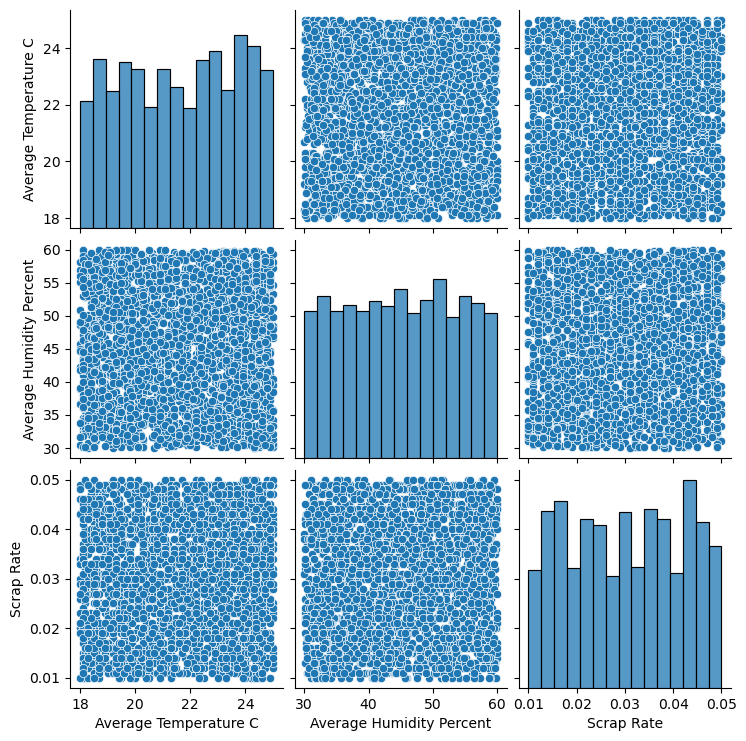

In [49]:
plt.figure(dpi=140)
sns.pairplot(data=data3);